# <center>Computer Vision</center>  <center>Spring 2022</center> 

#### Histogram Equalization of an image


+ Sometimes the image intensity is not clear, may be the camera facing away from the light or at night. These images are low-quality and bit-fuzzy. We can enhance such images to a better version
+ Histogram Equalization improves the contrast and brightness of an image, in order to stretch out the intensity range. 
+ It flattens the graylevel histogram of an image so that all intensities are as equally common as possible. 
+ We can easily improve lightning of the low contrast image. 
+ Almost all camera system and image editing tools use histogram equalization to make pictures look better or to enhance the contrast of the image.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Read the image
img = cv2.imread('dim.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB

#### Plotting RGB Histogram

cv2.calcHist(images, channels, mask, bins, ranges)

+ **image**: image we want to calculate the histogram of wrapped as a list, so if our image is in variable image we will pass [image],
+ **channel**: the index of the channels to consider wrapped as a list ([0] for gray-scale images as there's only one channel and [0], [1] or [2] for color images if we want to consider the channel green, blue or red respectively),
+ **mask**: mask to be applied on the image if we want to consider only a specific region (we're gonna ignore this in this post),
+ **bins**: list containing the number of bins to use for each channel,
+ **range**: range of the possible pixel values which is [0, 256] in case of RGB color space (where 256 is not inclusive).

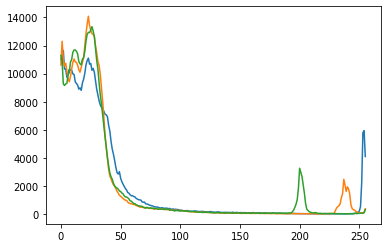

In [ ]:
# Calculate histogram without mask
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img],[1],None,[256],[0,256])
hist3 = cv2.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)

plt.savefig("dim_hist.png")
plt.show()

### YUV Colorspace

YUV colorspace is a bit unusual. The Y component determines the brightness of the color (referred to as luminance or luma), while the U and V components determine the color itself (the chroma).

https://softpixel.com/~cwright/programming/colorspace/yuv/

In [ ]:
# convert it to yuv color space
img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

In [ ]:
# apply histogram equalization 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

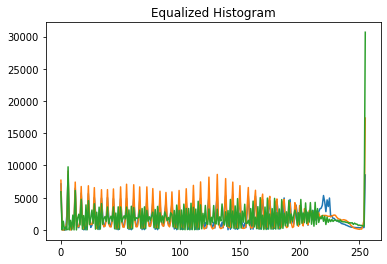

In [ ]:
hist1 = cv2.calcHist([hist_eq],[0],None,[256],[0,256])
hist2 = cv2.calcHist([hist_eq],[1],None,[256],[0,256])
hist3 = cv2.calcHist([hist_eq],[2],None,[256],[0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)
plt.title("Equalized Histogram")
plt.savefig("equalized_hist.png")
plt.show()

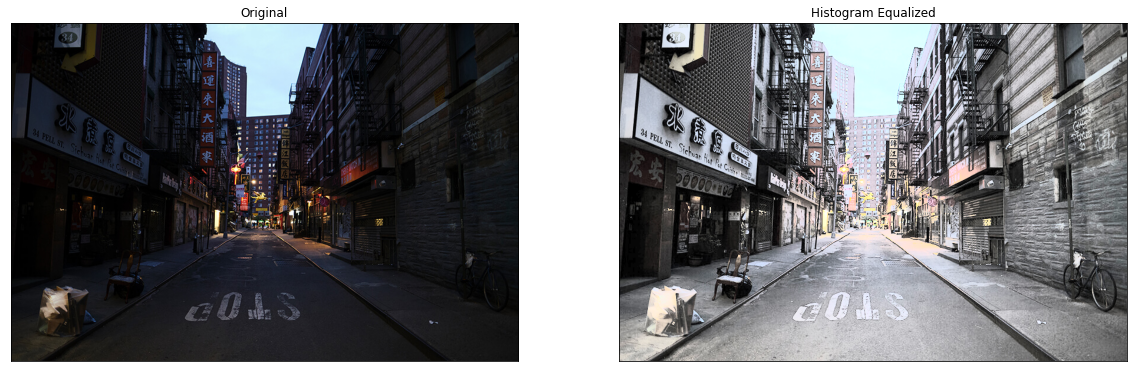

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(hist_eq)
plt.title('Histogram Equalized')
plt.xticks([])
plt.yticks([])
plt.savefig("eq_result.png")
plt.show()